### Importing pandas library so we can import our dataset

In [3]:
import pandas as pd

## About the dataset:
### In this tutorial we are using bank marketing dataset from UCI Machine Learning Repository
### Here is the link : https://archive.ics.uci.edu/dataset/222/bank+marketing

### We use `pd.read_csv()` to load the dataset from a CSV file, specifying `;` as the separator. The separator (`sep=';'`) is used because the values in the CSV file are separated by semicolons (`;`) rather than the default comma (`,`). This tells pandas how to correctly split the data into columns.
### The `df.head()` function displays the first 5 rows of the dataset.


In [4]:
df = pd.read_csv("bank-additional-full.csv",sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Now we will be doing preprocessing on this dataset


### 1. Handling Missing Values

- **Detect missing values** using `df.isnull().sum()`, which shows the number of null values in each column.
- Identifying missing data is a key step in preprocessing, as it helps decide how to handle incomplete information in the dataset.
- You can either remove rows/columns with missing values or fill them using techniques like mean, median, or mode imputation.


In [5]:
missing_values = df.isnull().sum()
print("Missing values in the dataset:", missing_values)

Missing values in the dataset: age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### 2. Encoding Categorical Variables

Now we'll change categorical data in our dataset into a format that can be used for analysis or modeling. Let's go through the code step by step:

- **Step 1: List Categorical Columns**  
  First, we create a list called **`categorical_columns`**. This list includes the names of the columns that contain categorical data, such as job type, marital status, and education. These columns hold categories instead of numbers.

- **Step 2: One-Hot Encoding**  
  Next, we use the **`pd.get_dummies()`** function to turn these categorical columns into "dummy" variables. Here’s what happens:
  - The function creates new columns for each category, using `0` or `1` to show whether a row belongs to that category. For example, if we have categories like 'teacher' and 'engineer', we’ll create two new columns. A `1` in the 'teacher' column means the person is a teacher, while a `0` means they are not.
  - We set **`drop_first=True`** to drop the first category for each column. This helps avoid problems in our analysis by keeping things simpler.

- **Step 3: Save the New Data**  
  Finally, we save the updated data in a new variable called **`data_encoded`**. This new DataFrame has all the original data but with the categorical variables changed into numbers, making it ready for analysis or modeling.


In [6]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

### 3. Scaling Numerical Variables

Now we’ll adjust the numerical data in our dataset so that all features are on the same scale. 
- **Step 1: List Numerical Columns**  
  First, we create a list called **`numerical_columns`**. This list includes the names of the columns with numerical data, like age, duration, and campaign. Scaling these columns makes sure they all have similar value ranges.

- **Step 2: Scale the Data**  
  Next, we create a **`StandardScaler()`** object. This tool helps change our numerical data so that it has an average (mean) of 0 and a range that is easier to work with. We apply this scaling to our numerical columns:
  - We use **`scaler.fit_transform()`** on the numerical columns in **`data_encoded`**. This function calculates the scaling values and applies them to the data.

- **Step 3: Show the Preprocessed Data**  
  Finally, we print the first 5 rows of the updated data to see how the scaling worked:



In [10]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
print("Preprocessed data (first 5 rows):")
print(data_encoded.head())

Preprocessed data (first 5 rows):
        age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.533034  0.010471 -0.565922  0.195414 -0.349494      0.648092   
1  1.628993 -0.421501 -0.565922  0.195414 -0.349494      0.648092   
2 -0.290186 -0.124520 -0.565922  0.195414 -0.349494      0.648092   
3 -0.002309 -0.413787 -0.565922  0.195414 -0.349494      0.648092   
4  1.533034  0.187888 -0.565922  0.195414 -0.349494      0.648092   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ... month_may  \
0        0.722722       0.886447    0.71246      0.33168  ...      True   
1        0.722722       0.886447    0.71246      0.33168  ...      True   
2        0.722722       0.886447    0.71246      0.33168  ...      True   
3        0.722722       0.886447    0.71246      0.33168  ...      True   
4        0.722722       0.886447    0.71246      0.33168  ...      True   

   month_nov  month_oct  month_sep  day_of_week_mon  day_of_week_thu  \
0      False      False     

### 4. Preparing Features and Labels

Now we’ll split our dataset into features (X) and labels (y) so we can analyze it or build a model. 

- **Step 1: Set Up Features (X)**  
  We create a new variable called **`X`** by removing the column **`'y'`** from the **`data_encoded`** DataFrame. This means **`X`** will include all the columns except the target variable. These columns are the features we will use for analysis.

- **Step 2: Set Up Labels (y)**  
  Next, we create a variable called **`y`** to hold the target labels. We take the **`'y'`** column from **`data_encoded`** and use a function to change it. The **`lambda`** function checks if each value is `'yes'`. If it is, it gives a value of `1`; if not, it gives a value of `0`. This converts our labels into numbers.


In [11]:
X = data_encoded.drop(columns=['y'])
y = data_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

### 5. Splitting the Dataset

Now we’ll divide our dataset into training and testing sets. This will help us build and evaluate our model. 

- **Step 1: Split the Data**  
  We use the **`train_test_split()`** function to split our features (X) and labels (y) into training and testing sets. Here’s what we do:
  - **`X_train`** and **`y_train`** will contain the data we use to train our model.
  - **`X_test`** and **`y_test`** will contain the data we use to test our model.
  - We set **`test_size=0.3`** to use 30% of the data for testing and 70% for training.
  - The **`random_state=42`** ensures that we get the same split every time we run the code.


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)

Training features shape: (28831, 53)
Testing features shape: (12357, 53)


### 6. Generating Summary Statistics

Now we’ll create summary statistics for our dataset. This will help us understand the data better. Let’s go through the code step by step:

- **Get Summary Statistics**  
  We use the **`describe()`** function to calculate summary statistics for our DataFrame (**`df`**). This function gives us important information such as the mean, minimum, maximum, and quartiles for each numerical column.
  

In [13]:
summary_stats = df.describe()
print("Summary statistics of the dataset:")
print(summary_stats)

Summary statistics of the dataset:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960

### 7. Visualizing Age Distribution

Now we’ll create a histogram to show the age distribution of clients in our dataset. This will help us see how ages are spread out.


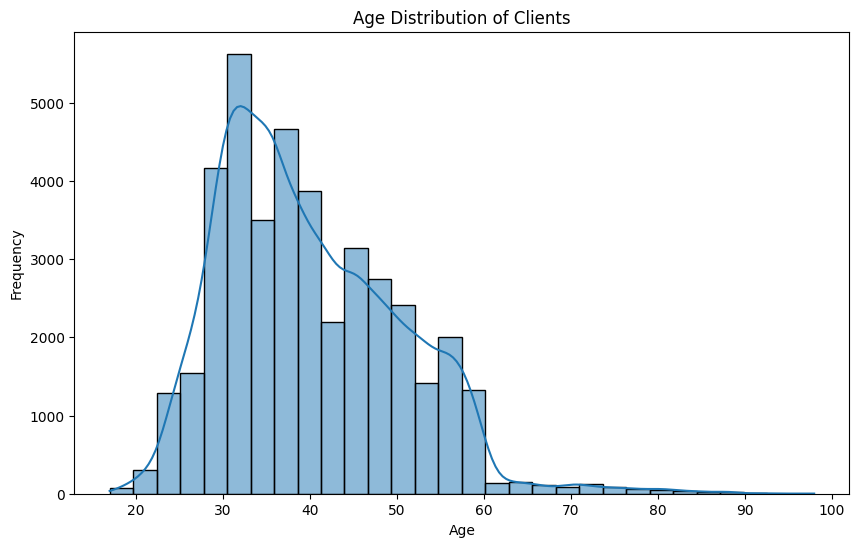

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### 8. Visualizing Job Distribution

Now we’ll create a count plot to show the distribution of clients by their job types. This will help us understand which jobs are most common among clients.



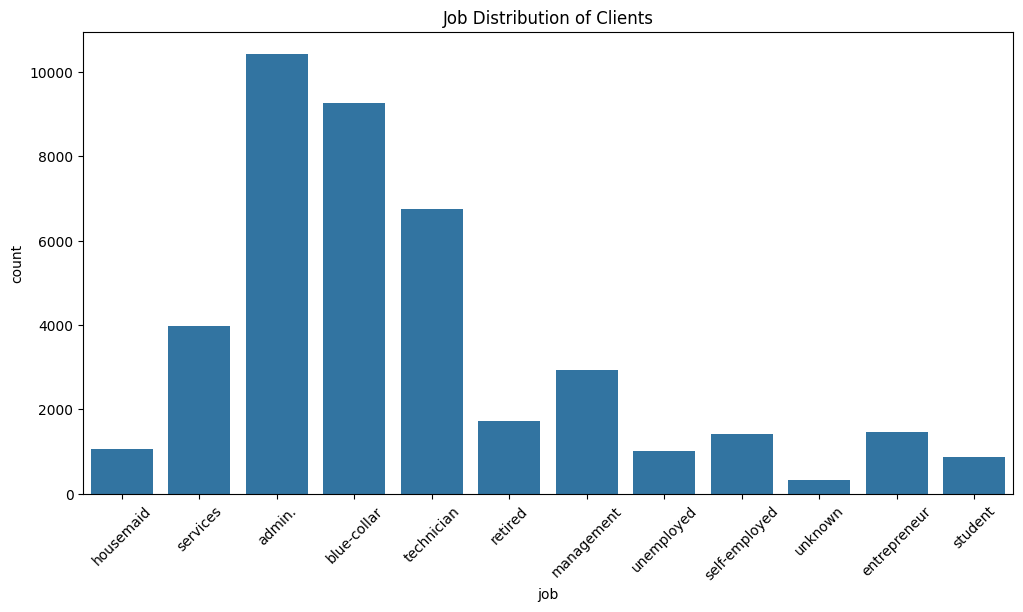

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df)
plt.title('Job Distribution of Clients')
plt.xticks(rotation=45)
plt.show()

### 9. Visualizing Correlation Matrix

Now we’ll create a heatmap to show the correlation between numerical features in our dataset. This will help us understand how these features are related to each other. 


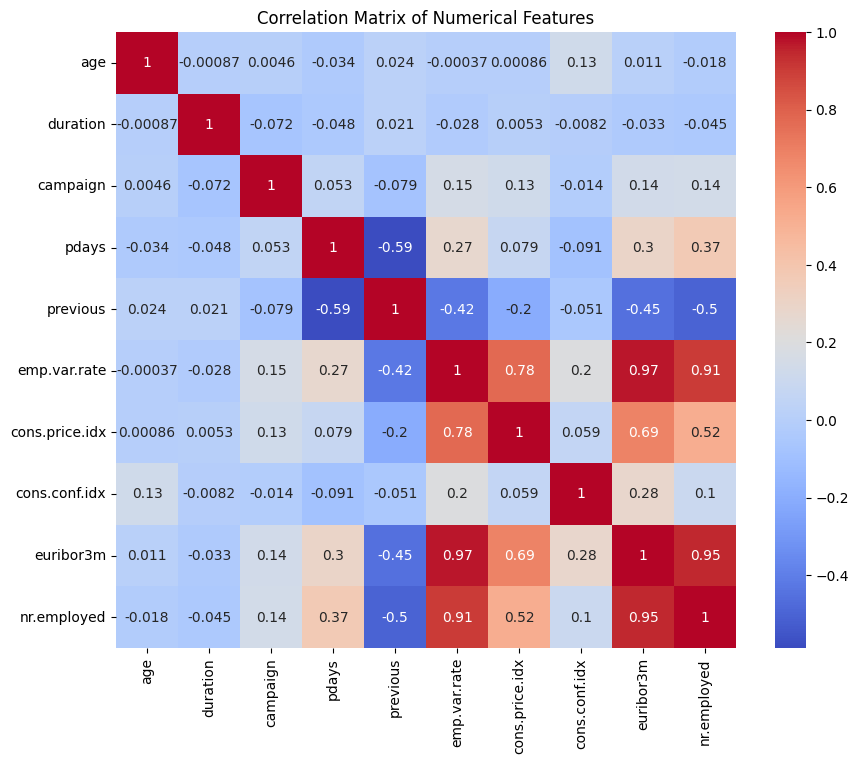

In [18]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_encoded[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 10. Visualizing Term Deposit Subscription Distribution
Now we’ll create a count plot to show the distribution of term deposit subscriptions in our dataset. This will help us understand how many clients subscribed to term deposits versus those who did not. 


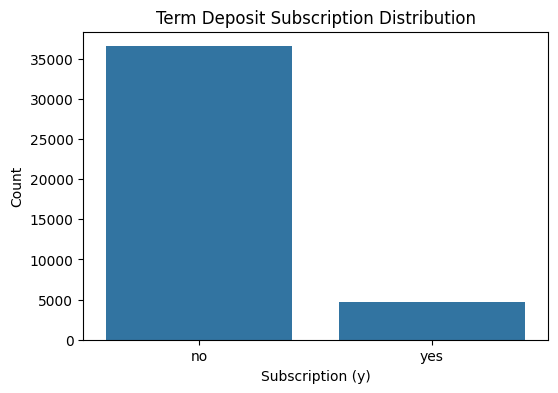

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Term Deposit Subscription Distribution')
plt.xlabel('Subscription (y)')
plt.ylabel('Count')
plt.show()